# 1.INSTALLING AND IMPORTING LIBRARIES 

In [43]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [1]:
import pandas as pd
import numpy as np 
import os 
import shutil
import re
import nltk
import matplotlib.pyplot as plt
import plotly
import seaborn as sns
plt.rc('figure',figsize=(17,13))
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
import nltk
from nltk.tokenize import word_tokenize
import seaborn as sns
from collections import Counter
#nltk.download('punkt')
#nltk.download('all')


# 2. TEXT FILE LOADING 

In [2]:
#loading the file using !wget
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

--2023-04-15 06:18:38--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  15.7MB/s    in 13s     

2023-04-15 06:18:51 (6.06 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [3]:
#unzipping the file using shutil library
shutil.unpack_archive("aclImdb_v1.tar.gz", "/content/")

# 3. TEXT FILE READING AND CONVERSION INTO DATAFRAME

Reading negative and positive reviews using os library


In [4]:
path = "/content/aclImdb/train/pos/"
temp = []
for file in os.listdir(path):
    with open(os.path.join(path + file), "r") as f:
        temp.append(f.readlines()[0])

first_1000 = temp[:1000]
train_pos = pd.DataFrame({"reviews": first_1000, "labels": list(np.ones(len(first_1000), dtype=int))})

In [5]:
path = "/content/aclImdb/train/neg/"
temp = []
for file in os.listdir(path):
    with open(os.path.join(path + file), "r") as f:
        temp.append(f.readlines()[0])
        
first_1000 = temp[:1000]
train_neg = pd.DataFrame({"reviews": first_1000, "labels": list(np.zeros(len(first_1000), dtype=int))})

In [6]:
path = "/content/aclImdb/test/pos/"
temp = []
for file in os.listdir(path):
    with open(os.path.join(path + file), "r") as f:
        temp.append(f.readlines()[0])
        
first_1000 = temp[:1000]
test_pos = pd.DataFrame({"reviews": first_1000, "labels": list(np.ones(len(first_1000), dtype=int))})

In [7]:
path = "/content/aclImdb/test/neg/"
temp = []
for file in os.listdir(path):
    with open(os.path.join(path + file), "r") as f:
        temp.append(f.readlines()[0])
        
first_1000 = temp[:1000]
test_neg = pd.DataFrame({"reviews": first_1000, "labels": list(np.zeros(len(first_1000), dtype=int))})

In [8]:
train_data = pd.concat([train_pos, train_neg], ignore_index=True)
test_data = pd.concat([test_pos, test_neg], ignore_index=True)


In [9]:
train_data.head(10)

,reviews,labels
0,"Good horror movies from France are quite rare,...",1
1,"In the immortal ""Shaun of the Dead"", we are in...",1
2,It's very funny. It has a great cast who each ...,1
3,Having only seen two of his pictures previousl...,1
4,I picked this up in the 'Danger After Dark' bo...,1
5,I can safely admit (as an IMDb geek) that 'Pha...,1
6,Joe Buck (Jon Voight) decides he's going to le...,1
7,I gather from reading the previous comments th...,1
8,Go see this movie for the gorgeous imagery of ...,1
9,For me this is Ealing Studio's most perfect fi...,1


In [10]:
test_data.head(10)

,reviews,labels
0,"I saw this film via one of the actors' agents,...",1
1,Or at least you feel pretty high after this mo...,1
2,"After all these years, of Peter O'Tool's brill...",1
3,'Anne Christie' was Garbo's 14th film and the ...,1
4,"As i watched ""Wirey Spindell"" i couldnt but la...",1
5,The Wind and the Lion is well written and supe...,1
6,I was lucky enough recently to see Ingrid Berg...,1
7,"I'm out of words to describe the beauty of ""Th...",1
8,New guy at an armored car company gets talked ...,1
9,'Hitch' is a nice surprise: A romantic comedy ...,1


# 4. TEXT CLEANING

In [11]:
#This is just for clear explanation. We can do all this in very small number of steps. And surely within a single funtion with very less computational complexity

def tokenize_data(dataset):
  tokenizer = nltk.tokenize.TreebankWordTokenizer()
  
  for i in range(dataset.shape[0]): 
    dataset["reviews"][i] = tokenizer.tokenize(dataset["reviews"][i])
  return dataset

def remove_stop_words(dataset):
  stop_words = set(stopwords.words('english'))
  
  for i in range(dataset.shape[0]):
    dataset["reviews"][i] = ([token.lower() for token in dataset["reviews"][i] if token not in stop_words])
  return dataset

def normalize(dataset):
  lemmatizer = nltk.stem.WordNetLemmatizer() 

  for i in range(dataset.shape[0]):
    dataset.reviews[i] = " ".join([lemmatizer.lemmatize(token) for token in dataset.reviews[i]]).strip()
  return dataset

def remove_garbage(dataset):
    garbage = "~`!@#$%^&*()_-+={[}]|\:;'<,>.?<br/>"
    for i in range(dataset.shape[0]):
      dataset.reviews[i] = "".join([char for char in dataset.reviews[i] if char not in garbage])
    return dataset

In [12]:
train_data.isna().sum()

reviews    0
labels     0
dtype: int64

In [13]:
test_data.isna().sum()

reviews    0
labels     0
dtype: int64

# Visualisation

In [14]:
from wordcloud import WordCloud 

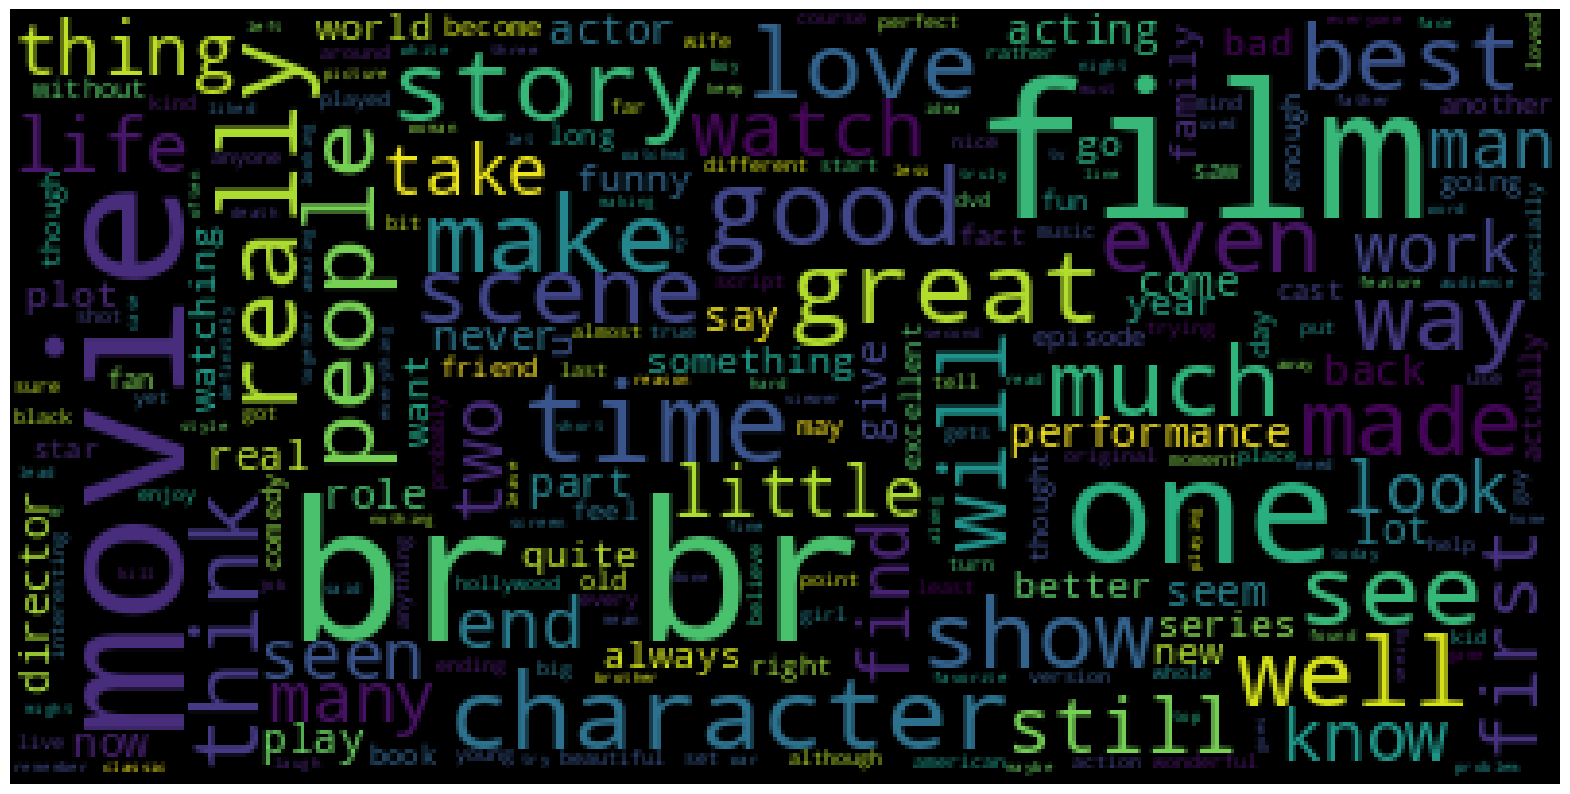

In [15]:
text=' '.join(train_pos['reviews']).lower()
def wc(data,bgcolor,title):
   plt.figure(figsize=(20,20))
   wc=WordCloud(background_color=bgcolor,max_words=10000,max_font_size=50)
   wc.generate(text)
   plt.imshow(wc)
   plt.axis('off')

wc(text,'black','Most of used words')

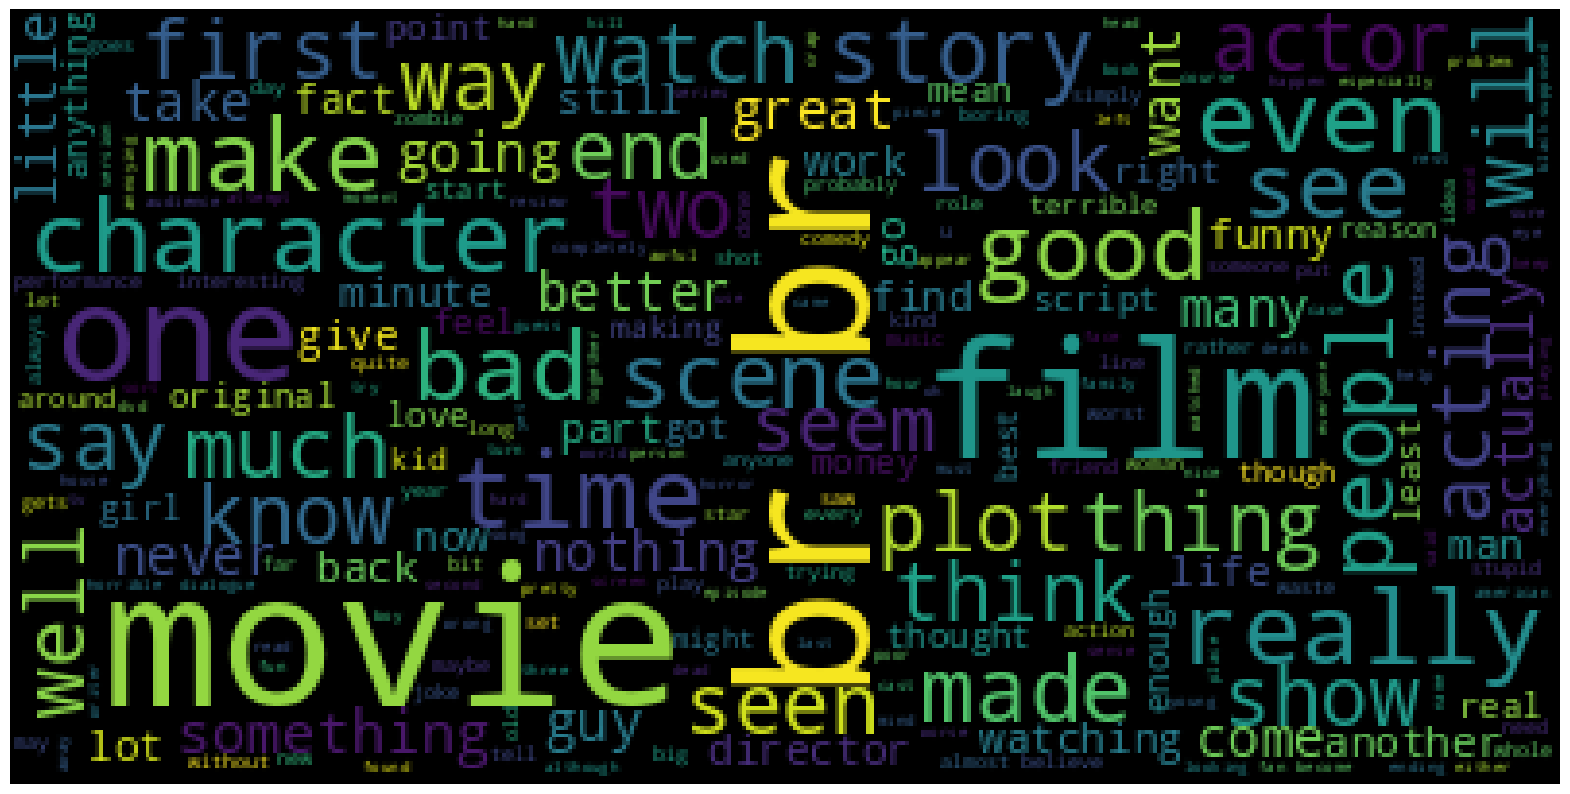

In [16]:
text=' '.join(train_neg['reviews']).lower()
def wc(data,bgcolor,title):
   plt.figure(figsize=(20,20))
   wc=WordCloud(background_color=bgcolor,max_words=10000,max_font_size=50)
   wc.generate(text)
   plt.imshow(wc)
   plt.axis('off')

wc(text,'black','Most of used words')

# Analysing Sentiment Scores using VADER and TextBlob and its visualisation

In [17]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 7.3 MB/s eta 0:00:00


In [18]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [19]:
! pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
 from nltk.sentiment import SentimentAnalyzer

In [21]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [22]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
scores=[]
for i in range(len(train_data['reviews'])):
    
    score = analyser.polarity_scores(train_data['reviews'][i])
    score=score['compound']
    scores.append(score)
sentiment=[]
for i in scores:
    if i>=0.05:
        sentiment.append('Positive')
    elif i<=(-0.05):
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
train_data['sentiment']=pd.Series(np.array(sentiment))
train_data['scores']=pd.Series(np.array(scores))

In [23]:
from textblob import TextBlob
scores=train_data['calculated_using_textblob'] = train_data['reviews'].apply(lambda x: (TextBlob(x).sentiment.polarity))
sentiment=[]
for i in scores:
    if i>=(0.1):
        sentiment.append('Positive')
    elif i<=(0.1):
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
train_data['sentiment_using_TextBlob']=pd.Series(np.array(sentiment))


In [24]:
train_data.tail()

,reviews,labels,sentiment,scores,calculated_using_textblob,sentiment_using_TextBlob
1995,"I can not believe such slanted, jingoistic mat...",0,Positive,0.9275,0.132581,Positive
1996,I've noticed over the years that when a rock s...,0,Positive,0.9056,0.002657,Negative
1997,I just saw this Movie on a local TV Station (T...,0,Negative,-0.9142,-0.132792,Negative
1998,This is not really a proper review since I did...,0,Positive,0.8129,-0.025595,Negative
1999,I managed to grab a viewing of this with the a...,0,Negative,-0.9224,0.015357,Negative


In [25]:
train_data['sentiment_using_TextBlob'].value_counts()

Positive    1008
Negative     992
Name: sentiment_using_TextBlob, dtype: int64

In [26]:
train_data['calculated_using_textblob'].min()

-0.53125

In [27]:
temp = train_data.groupby('sentiment_using_TextBlob').count()['reviews'].reset_index().sort_values(by='reviews',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment_using_TextBlob,reviews
1,Positive,1008
0,Negative,992


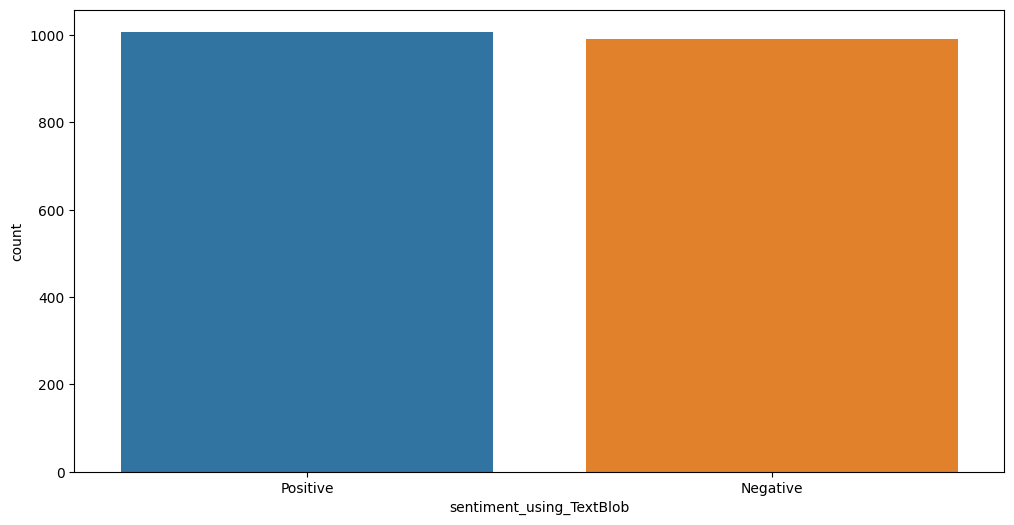

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment_using_TextBlob',data=train_data)
fig = go.Figure(go.Funnelarea(
    text =temp.sentiment_using_TextBlob,
    values = temp.reviews,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()


Positive and negative got almost equal half % which is right because half of the reviews are positive and half of them are negative which means text blob worked well on the dataset since it shows the cleaned and tokenized dataset is easier to understand and can be used succesfully for sentiment prediction

# Analyzing text statistics

word frequency analysis,
sentence length analysis,
average word length analysis,

<Axes: >

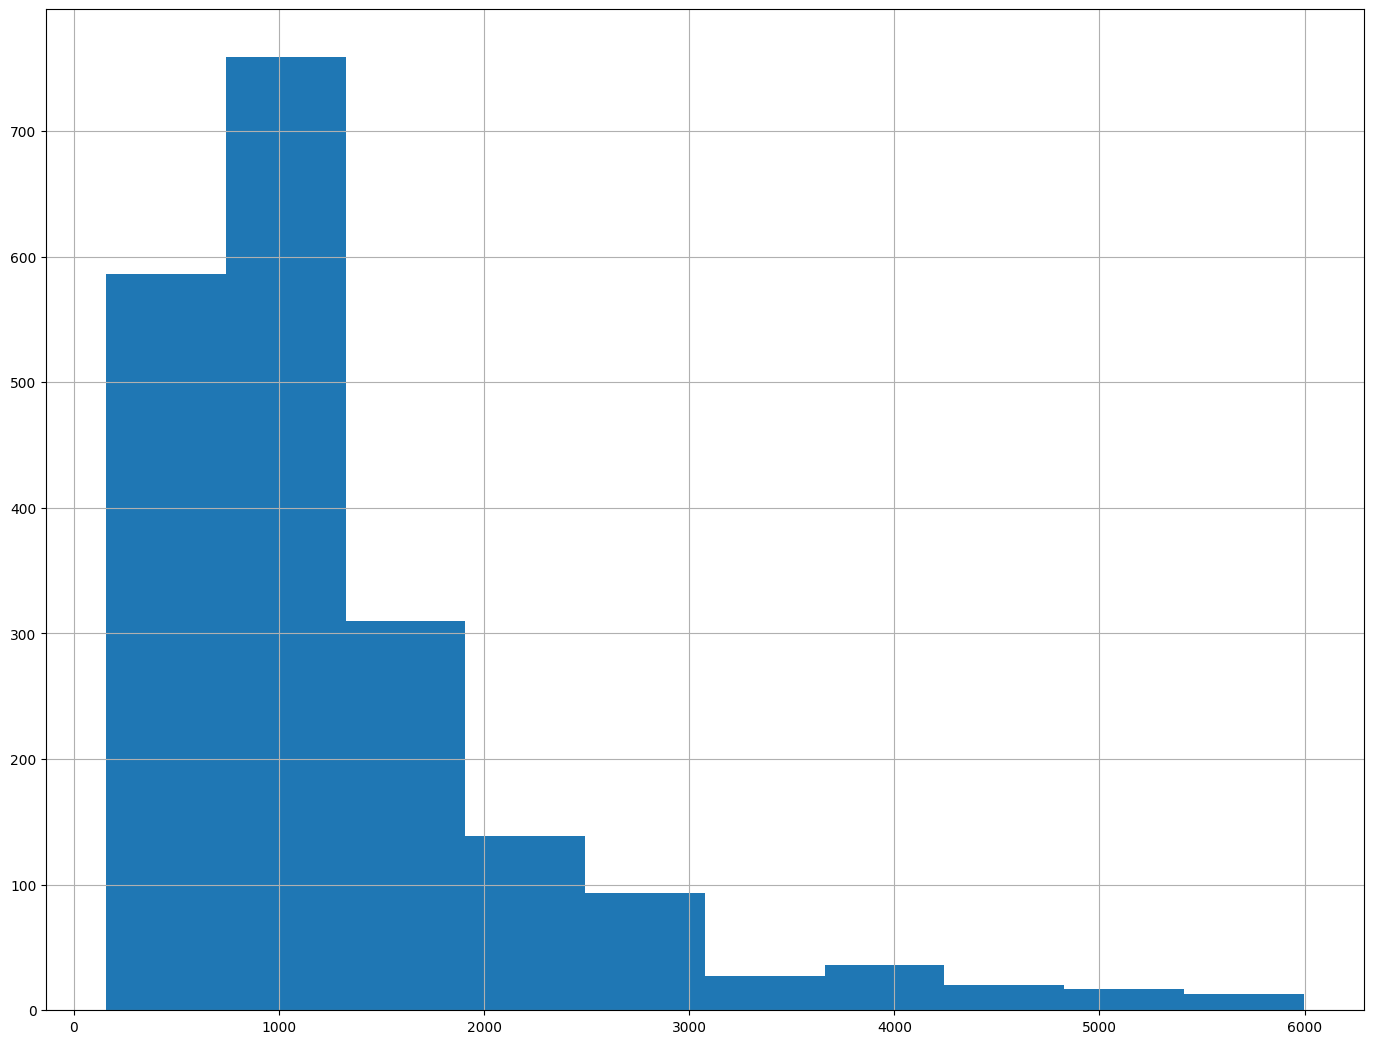

In [29]:
train_data['reviews'].str.len().hist()

The histogram shows that news headlines range from  100 to 7000 characters and generally, it is between 100 to 1000 characters.

# Now, we will move on to data exploration at a word-level. Let’s plot thenumber of words appearing in each review

<Axes: >

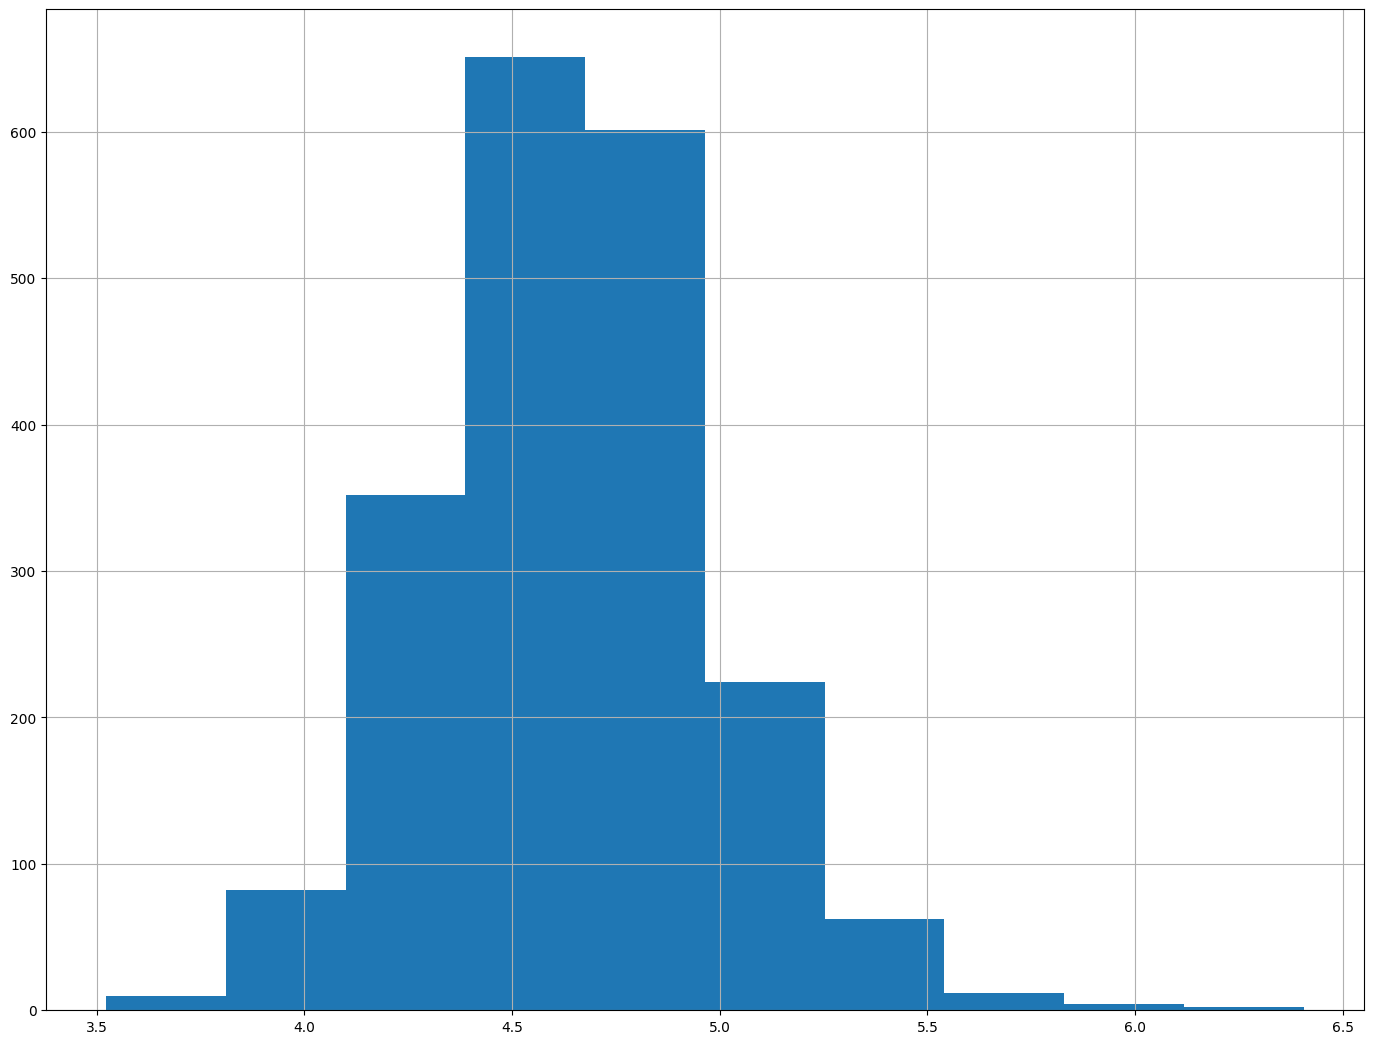

In [30]:
train_data['reviews'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

Average word length in each review is from 3-6 characters. 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<BarContainer object of 10 artists>

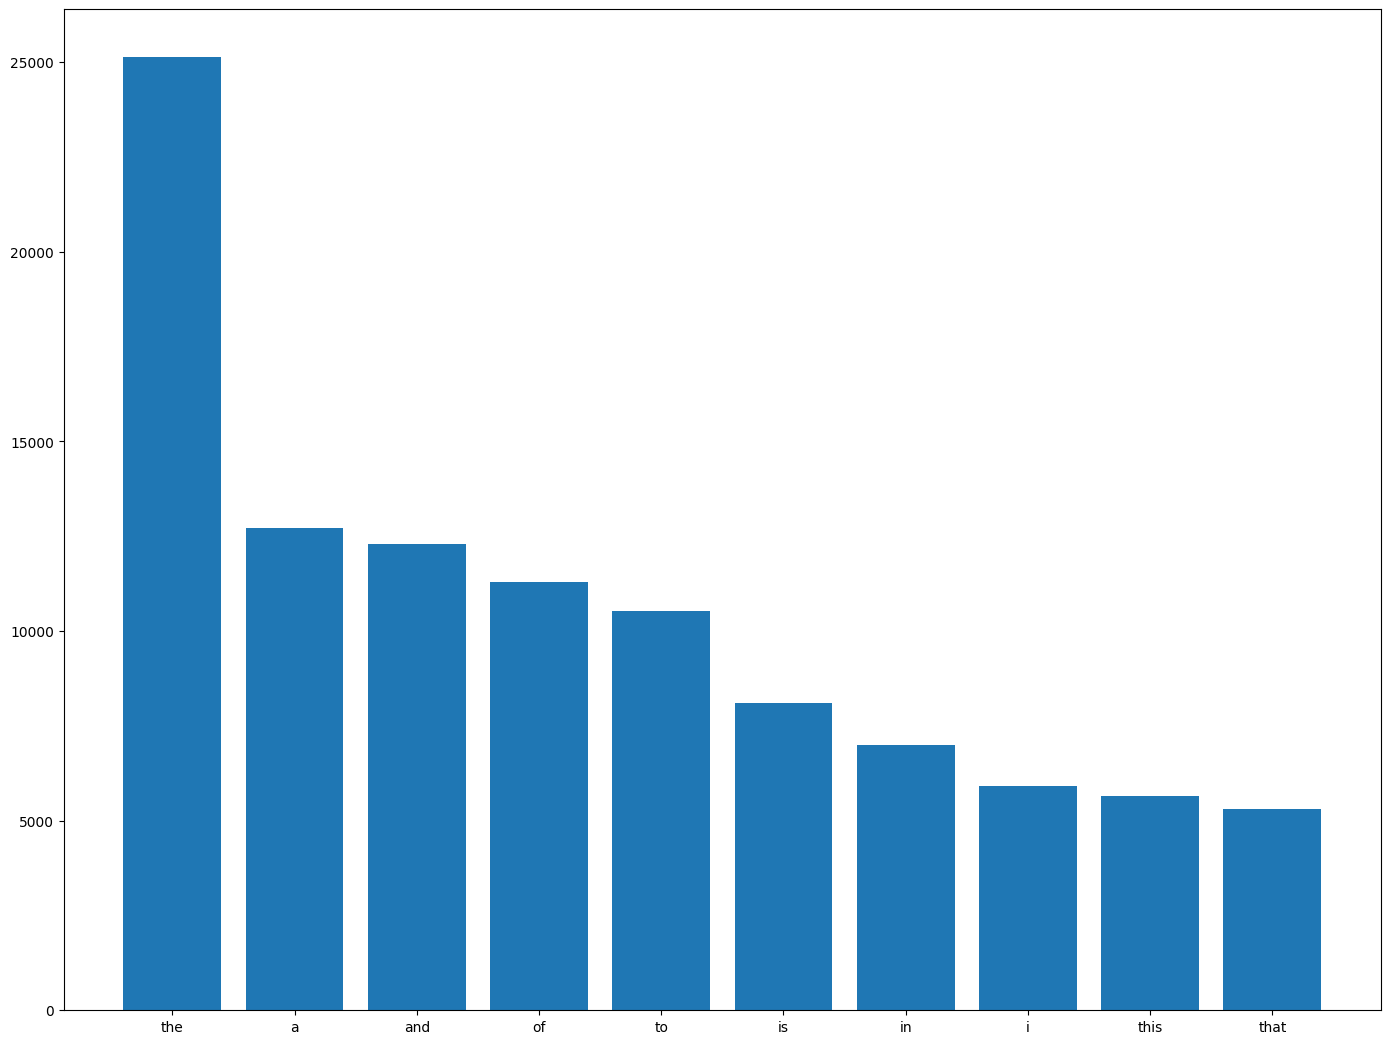

In [31]:
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=set(stopwords.words('english'))
corpus=[]
train_data['reviews']=train_data['reviews'].str.lower()
new= train_data['reviews'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

We can evidently see that stopwords such as “the”,” and” and “a” dominate in the reviews.



 We will use the counter function from the collections library to count and store the occurrences of each word in a list of tuples. This is a very useful function when we deal with word-level analysis in natural language processing.

<Axes: >

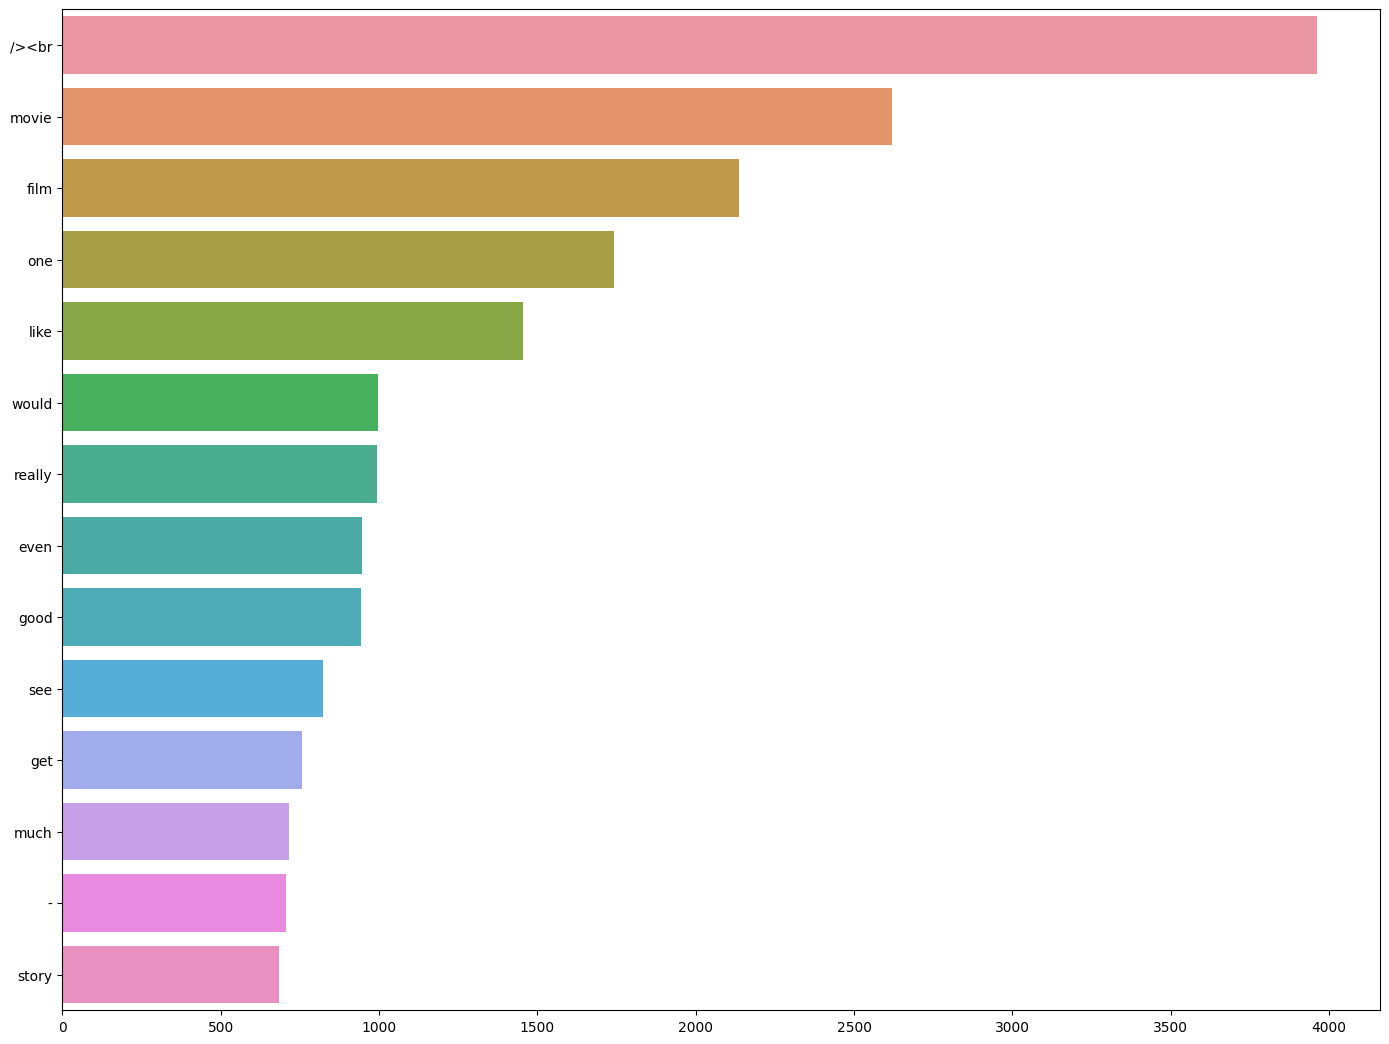

In [32]:
import collections
from collections import Counter 
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:80]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

# Ngram exploration

Ngrams are simply contiguous sequences of n words. For example “riverbank”,” The three musketeers” etc.If the number of words is two, it is called bigram. For 3 words it is called a trigram and so on.

Looking at most frequent n-grams can give you a better understanding of the context in which the word was used.

In [33]:
import sklearn.feature_extraction.text
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
from nltk.util import ngrams
list(ngrams(['the' ,'best','movie','I','have','seen'],2))

[('the', 'best'),
 ('best', 'movie'),
 ('movie', 'I'),
 ('I', 'have'),
 ('have', 'seen')]

In [35]:
def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    def get_top_ngram(corpus, n=None):
      vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
      bag_of_words = vec.transform(corpus)
      sum_words = bag_of_words.sum(axis=0) 
      words_freq = [(word, sum_words[0, idx]) 
                   for word, idx in vec.vocabulary_.items()]
      words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
      return words_freq[:10]
    
    top_n_bigrams=get_top_ngram(text,n)[:20]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

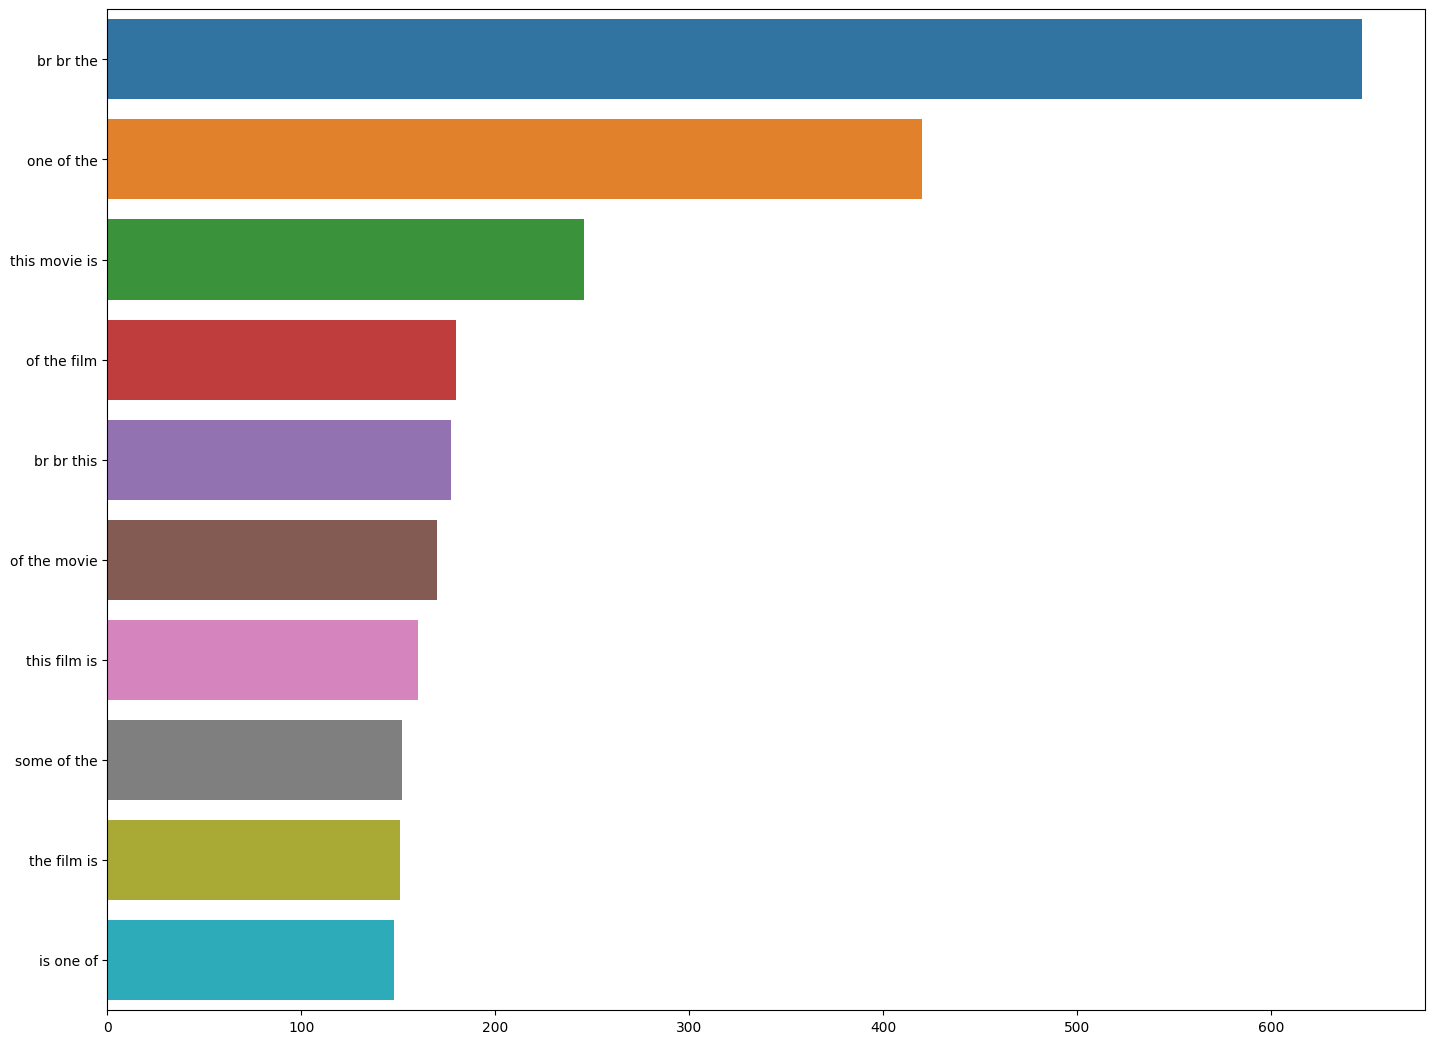

In [36]:
plot_top_ngrams_barchart(train_data['reviews'],n=3)

# Exploration through parts of speech tagging in Python

Parts of speech (POS) tagging is a method that assigns part of speech labels to words in a sentence. There are eight main parts of speech:

Noun (NN) 
Verb (VB)
Adjective(JJ)
Adverb(RB)
Preposition(IN)
Conjunction(CC) 
Pronoun(PRP)
Interjection (INT)






<Axes: >

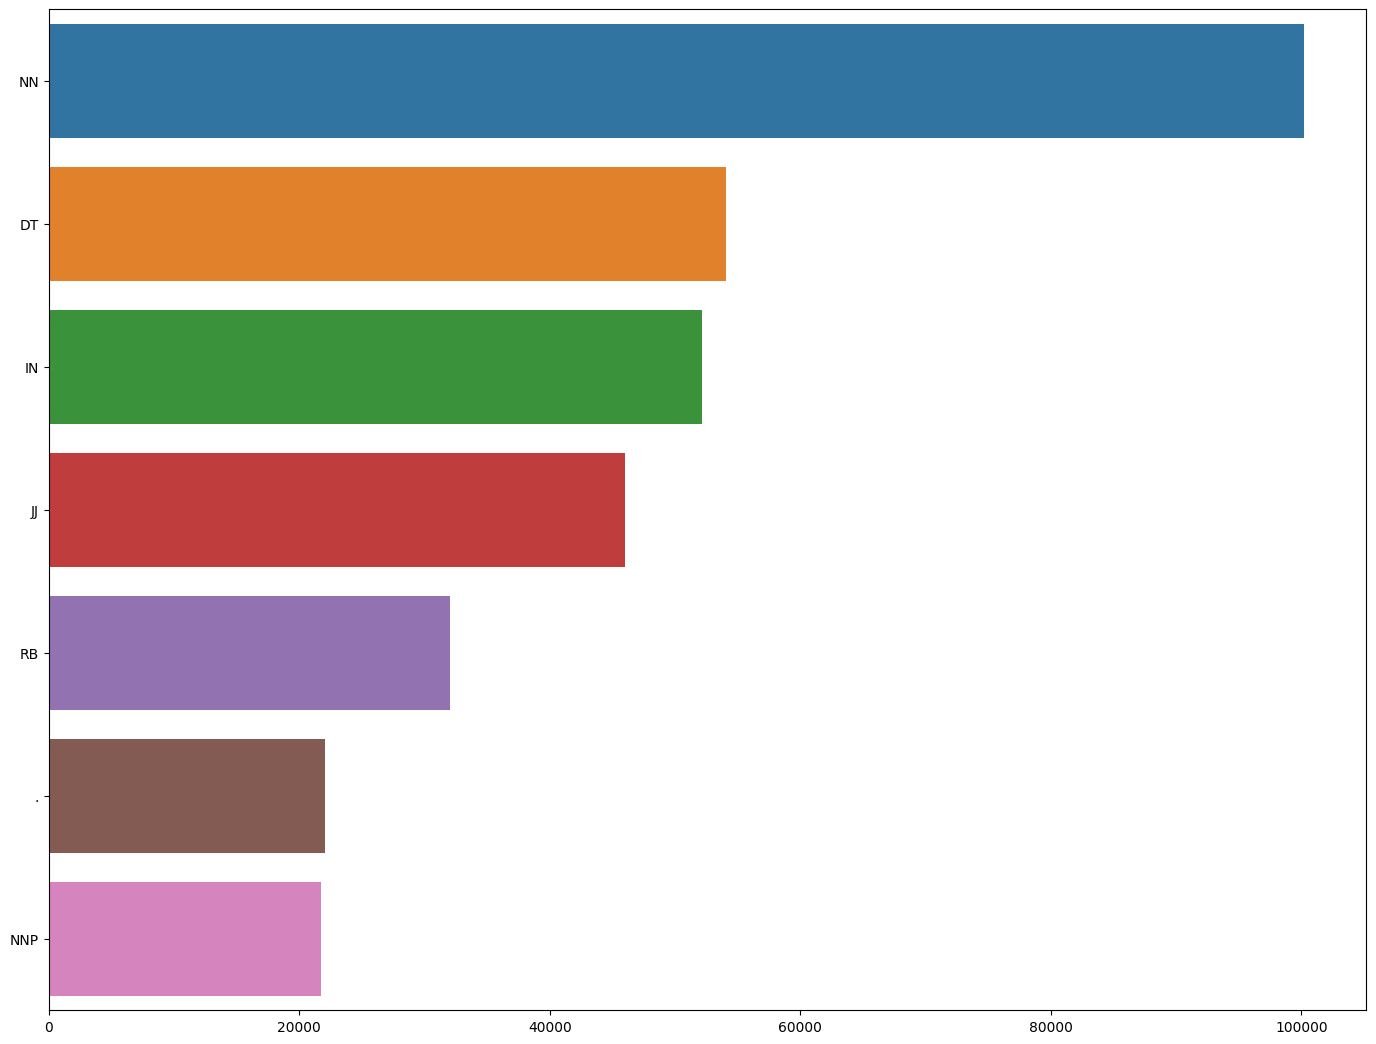

In [44]:
def plot_parts_of_speach_barchart(text):
    nltk.download('averaged_perceptron_tagger')

def pos(text):
    pos=nltk.pos_tag(word_tokenize(text))
    pos=list(map(list,zip(*pos)))[1]
    return pos

tags=train_data['reviews'].apply(lambda x : pos(x))
tags=[x for l in tags for x in l]
counter=Counter(tags)

x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)

<Axes: >

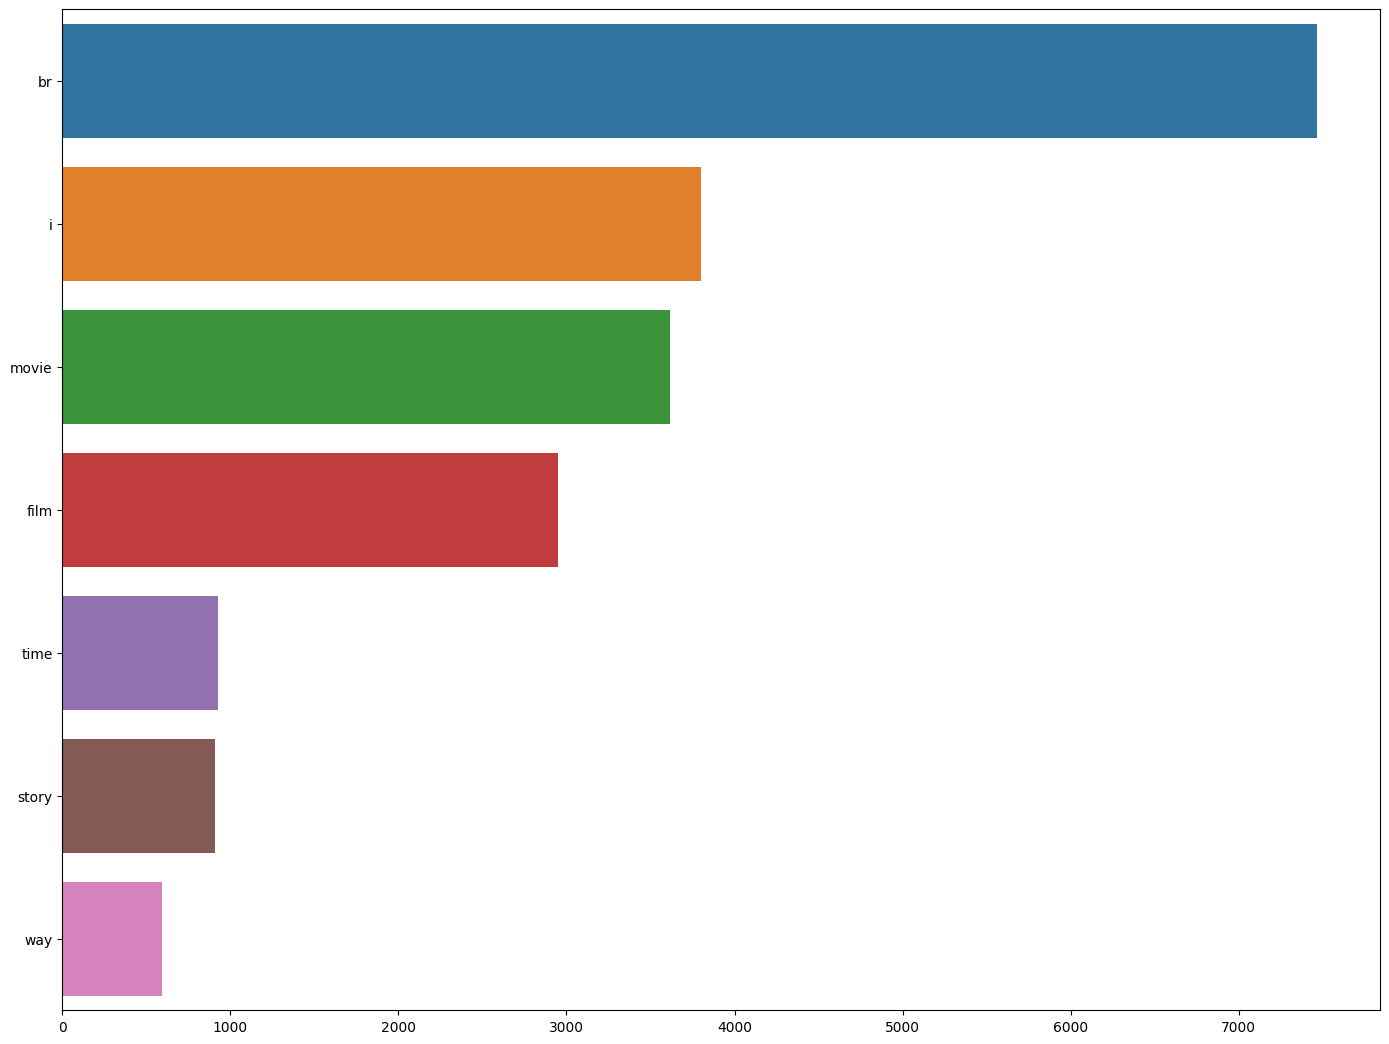

In [45]:
def get_adjs(text):
    adj=[]
    pos=nltk.pos_tag(word_tokenize(text))
    for word,tag in pos:
        if tag=='NN':
            adj.append(word)
    return adj


words=train_data['reviews'].apply(lambda x : get_adjs(x))
words=[x for l in words for x in l]
counter=Counter(words)

x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)

<Axes: >

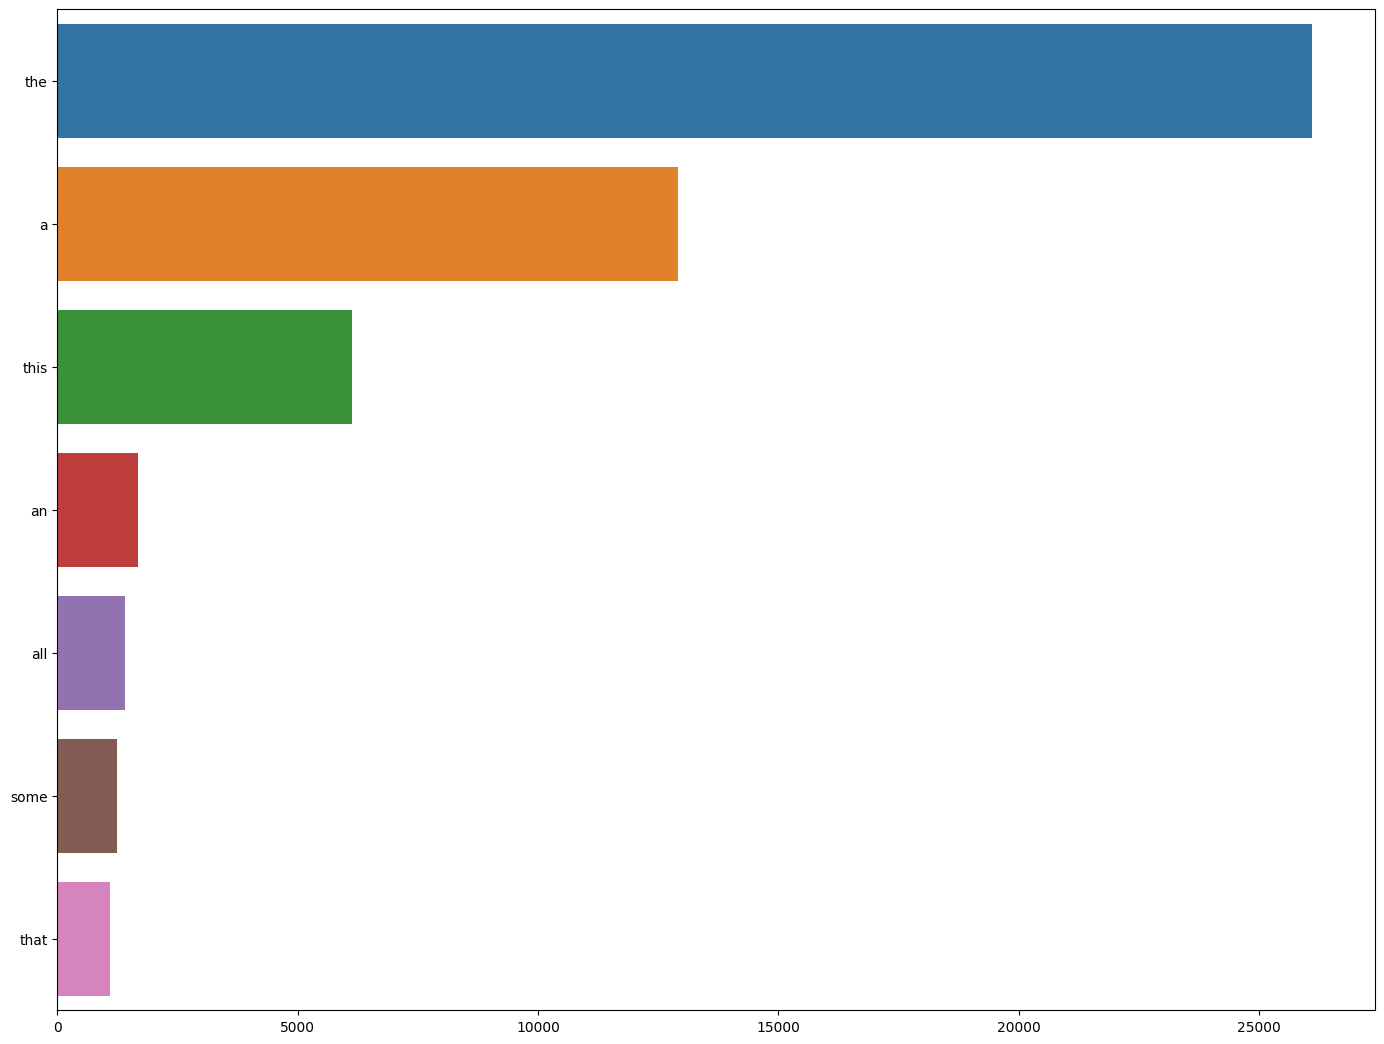

In [46]:
def get_adjs(text):
    adj=[]
    pos=nltk.pos_tag(word_tokenize(text))
    for word,tag in pos:
        if tag=='DT':
            adj.append(word)
    return adj


words=train_data['reviews'].apply(lambda x : get_adjs(x))
words=[x for l in words for x in l] 
counter=Counter(words)

x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)

# TfID VECTORIZATION -term frequency-inverse document frequency.

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
def fit_corpus(train_data, test_data):
  corpus = pd.DataFrame({"reviews": train_data["reviews"]})
  corpus.reviews.append(test_pos["reviews"], ignore_index=True)
  tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1,2))
  tfidf.fit(corpus["reviews"])
  return tfidf
def transform_data(tfidf, dataset):
  features = tfidf.transform(dataset["reviews"])
  return pd.DataFrame(features.todense(), columns = tfidf.get_feature_names_out())

In [48]:
tfidf = fit_corpus(train_data,test_data)
train_features = transform_data(tfidf, train_data)
test_features = transform_data(tfidf, test_data)

train_labels = train_data["labels"]
test_labels = test_data["labels"]

<ipython-input-47-bb8535c1ce6b>:4: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [49]:
train_features.head()

,00,000,000 000,000 budget,000 it,000 the,01,02,10,10 10,...,zombies to,zone,zoom,zooming,zooming in,zooms,zorro,zucker,zucker and,zuniga
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.043997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
train_labels.head()

0    1
1    1
2    1
3    1
4    1
Name: labels, dtype: int64

#Random Forest 

In [77]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(train_features,train_labels)
Y_pred = clf.predict(test_features)
prediction_linear = classifier_linear.predict(test_features)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
#result_rnmdfst = show_performance_data(Y_test, Y_pred, 'rndmfst')

In [78]:
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(test_data['labels'], prediction_linear, output_dict=True)


Training time: 101.388558s; Prediction time: 560.902123s


In [79]:
report

{'0': {'precision': 0.8753959873284055,
  'recall': 0.829,
  'f1-score': 0.8515665125834616,
  'support': 1000},
 '1': {'precision': 0.8376068376068376,
  'recall': 0.882,
  'f1-score': 0.859230394544569,
  'support': 1000},
 'accuracy': 0.8555,
 'macro avg': {'precision': 0.8565014124676216,
  'recall': 0.8554999999999999,
  'f1-score': 0.8553984535640153,
  'support': 2000},
 'weighted avg': {'precision': 0.8565014124676216,
  'recall': 0.8555,
  'f1-score': 0.8553984535640153,
  'support': 2000}}

# Logisitc regression 

In [59]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs')
clf.fit(train_features, train_labels)
print(f"The score for complete test reviews is: {clf.score(test_features, test_labels) * 100 } %")

The score for complete test reviews is: 84.2 %


# SVM

In [70]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_features, train_data['labels'])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_features)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(test_data['labels'], prediction_linear, output_dict=True)



Training time: 101.388558s; Prediction time: 85.070942s


In [74]:
report

{'0': {'precision': 0.8753959873284055,
  'recall': 0.829,
  'f1-score': 0.8515665125834616,
  'support': 1000},
 '1': {'precision': 0.8376068376068376,
  'recall': 0.882,
  'f1-score': 0.859230394544569,
  'support': 1000},
 'accuracy': 0.8555,
 'macro avg': {'precision': 0.8565014124676216,
  'recall': 0.8554999999999999,
  'f1-score': 0.8553984535640153,
  'support': 2000},
 'weighted avg': {'precision': 0.8565014124676216,
  'recall': 0.8555,
  'f1-score': 0.8553984535640153,
  'support': 2000}}

In [76]:
import sklearn.metrics
from sklearn.metrics import accuracy_score,confusion_matrix

print("Accuracy of model is {}%".format(accuracy_score(test_data['labels'],prediction_linear) * 100))

Accuracy of model is 85.55%


#KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(train_features, train_labels)
#Y_pred = neigh.predict(test_features)


KNeighborsClassifier()

{'0': {'precision': 0.8753959873284055,
  'recall': 0.829,
  'f1-score': 0.8515665125834616,
  'support': 1000},
 '1': {'precision': 0.8376068376068376,
  'recall': 0.882,
  'f1-score': 0.859230394544569,
  'support': 1000},
 'accuracy': 0.8555,
 'macro avg': {'precision': 0.8565014124676216,
  'recall': 0.8554999999999999,
  'f1-score': 0.8553984535640153,
  'support': 2000},
 'weighted avg': {'precision': 0.8565014124676216,
  'recall': 0.8555,
  'f1-score': 0.8553984535640153,
  'support': 2000}}

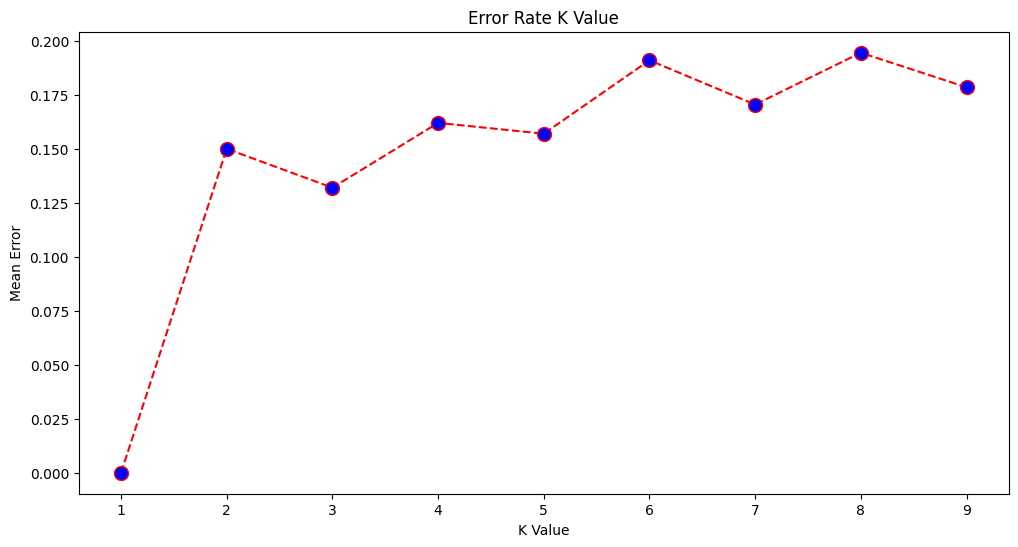

In [73]:
from sklearn.neighbors import KNeighborsClassifier
error = []


for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_features,train_labels)
    pred_i = knn.predict(train_features)
    error.append(np.mean(pred_i != train_labels))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
report = classification_report(test_data['labels'], prediction_linear, output_dict=True)
report

#XGBOOST